In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import re
from gensim.models import Word2Vec
import itertools
import nltk
from collections import Counter

In [3]:
data = pd.read_csv('Food_Inspections.csv')

In [4]:
data = data['Violations']

In [5]:
data = data.fillna('no_comment')

In [6]:
data = list(data)

In [7]:
data[0]

'10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE - Comments:  5-203.11 OBSERVED NO HAND SINK IN REAR WARE WASHING AREA OF FACILITY. FACILITY MUST OBTAIN AND INSTALL A HAND SINK UNDER CITY WATER PRESSURE AND MAINTAIN. PRIORITY FOUNDATION VIOLATION. 7-38-030(C). NO CITATION ISSUED | 38. INSECTS, RODENTS, & ANIMALS NOT PRESENT - Comments: OBSERVED ONE BABY ROACH CRAWLING ON HAND WASHING SINK NEAR FROSTY MACHINE BEHIND FRONT COUNTER, ONE LIVE ROACH CRAWLING ON FLOOR BEHIND FRONT COUNTER, ONE LIVE ROACH CRAWLING ON SURFACES UNDER GRILL IN FRONT LINE AREA, ONE LIVE ROACH CRAWLING INSIDE WARMER IN FRONT LINE AREA, ONE LIVE ROACH CRAWLING NEAR SODA LINES UNDER FRONT COUNTER, ONE LIVE ROACH CRAWLING ON SHELVING UNIT ABOVE PREP COOLER ALONG EAST WALL, ONE LIVE ROACH CRAWLING ON SHELVING UNIT UNDER CASH REGISTER IN DRIVE THRU AREA, ONE LIVE ROACH CRAWLING ON FLOOR UNDER SODA DISPENSER UNIT NEAR OFFICE. INSTRUCTED MANAGER TO CALL AN EXTERMINATOR FOR SERVICE, CLEAN AND SANITIZE ALL 

In [8]:
for i in range(len(data)):
    try:
        data[i] = data[i].split('|')
    except AttributeError:
        pass

In [9]:
data[0]

['10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE - Comments:  5-203.11 OBSERVED NO HAND SINK IN REAR WARE WASHING AREA OF FACILITY. FACILITY MUST OBTAIN AND INSTALL A HAND SINK UNDER CITY WATER PRESSURE AND MAINTAIN. PRIORITY FOUNDATION VIOLATION. 7-38-030(C). NO CITATION ISSUED ',
 ' 38. INSECTS, RODENTS, & ANIMALS NOT PRESENT - Comments: OBSERVED ONE BABY ROACH CRAWLING ON HAND WASHING SINK NEAR FROSTY MACHINE BEHIND FRONT COUNTER, ONE LIVE ROACH CRAWLING ON FLOOR BEHIND FRONT COUNTER, ONE LIVE ROACH CRAWLING ON SURFACES UNDER GRILL IN FRONT LINE AREA, ONE LIVE ROACH CRAWLING INSIDE WARMER IN FRONT LINE AREA, ONE LIVE ROACH CRAWLING NEAR SODA LINES UNDER FRONT COUNTER, ONE LIVE ROACH CRAWLING ON SHELVING UNIT ABOVE PREP COOLER ALONG EAST WALL, ONE LIVE ROACH CRAWLING ON SHELVING UNIT UNDER CASH REGISTER IN DRIVE THRU AREA, ONE LIVE ROACH CRAWLING ON FLOOR UNDER SODA DISPENSER UNIT NEAR OFFICE. INSTRUCTED MANAGER TO CALL AN EXTERMINATOR FOR SERVICE, CLEAN AND SANITIZE

In [10]:
for i in range(len(data)):
    for j in range(len(data[i])):
        try:
            data[i][j] = data[i][j].split('Comments:')[1]
        except IndexError:
            pass

In [11]:
data[0]

['  5-203.11 OBSERVED NO HAND SINK IN REAR WARE WASHING AREA OF FACILITY. FACILITY MUST OBTAIN AND INSTALL A HAND SINK UNDER CITY WATER PRESSURE AND MAINTAIN. PRIORITY FOUNDATION VIOLATION. 7-38-030(C). NO CITATION ISSUED ',
 ' OBSERVED ONE BABY ROACH CRAWLING ON HAND WASHING SINK NEAR FROSTY MACHINE BEHIND FRONT COUNTER, ONE LIVE ROACH CRAWLING ON FLOOR BEHIND FRONT COUNTER, ONE LIVE ROACH CRAWLING ON SURFACES UNDER GRILL IN FRONT LINE AREA, ONE LIVE ROACH CRAWLING INSIDE WARMER IN FRONT LINE AREA, ONE LIVE ROACH CRAWLING NEAR SODA LINES UNDER FRONT COUNTER, ONE LIVE ROACH CRAWLING ON SHELVING UNIT ABOVE PREP COOLER ALONG EAST WALL, ONE LIVE ROACH CRAWLING ON SHELVING UNIT UNDER CASH REGISTER IN DRIVE THRU AREA, ONE LIVE ROACH CRAWLING ON FLOOR UNDER SODA DISPENSER UNIT NEAR OFFICE. INSTRUCTED MANAGER TO CALL AN EXTERMINATOR FOR SERVICE, CLEAN AND SANITIZE ALL AREAS. PRIORITY VIOLATION 7-38-020(A) ',
 ' 4-601.11 ACCUMULATION ON FOOD DEBRIS GREASE DUST UNDER SHELVES, EQUIPMENT, CORNERS

In [12]:
for i in range(len(data)):
    for j in range(len(data[i])):
        data[i][j] = re.sub('[^A-Za-z]+', ' ', data[i][j])
        data[i][j] = data[i][j].lower()
        data[i][j] = data[i][j].split(' ')[1:-1]
    data[i] = list(itertools.chain(*data[i]))
    data[i] = ' '.join(data[i])
    data[i] = ' '.join( [w for w in data[i].split() if len(w)>1] )

In [13]:
data[1]

'pic doesn demonstrate knowledge of food operation must provide priority foundation no citation issued observed no employees health policy must provide and maintain priority foundation no citation issued observed no clean up policy procedure for vomiting and diarrhea must provide and maintain priority foundation no citation issued observed no soap at hand sink in main front prep area hand sink employee had to go purchase soap from store soap was provided during inspection cos must provide soap and maintain at all times priority foundation observed improper reheating of cooked foods from inside of table top hot holding unit such as lbs cooked rice and lbs cooked beans instructed manager on reheating cooked foods to and hold at product was discarded by manager appx lbs priority observed improper cooling of cooked foods dated stored inside of various coolers such as lbs cooked steak lbs gallon buckets of salsa ranging from and gallon buckets of mole ranging from product was discarded by m

In [14]:
temp_data = data.copy()

In [15]:
for i in range(len(temp_data)):
    temp_data[i] = temp_data[i].split()

In [16]:
model = Word2Vec(temp_data,size=75,min_count=3)

In [17]:
model.most_similar('manager',topn=20)

[('manger', 0.8315080404281616),
 ('management', 0.7707287073135376),
 ('mgr', 0.7244964838027954),
 ('manage', 0.6365653872489929),
 ('managers', 0.6200328469276428),
 ('maanger', 0.5914634466171265),
 ('managment', 0.571448802947998),
 ('mgrs', 0.562881350517273),
 ('maanager', 0.5169547200202942),
 ('mgmt', 0.5095937252044678),
 ('operator', 0.5026035308837891),
 ('photocopy', 0.49408042430877686),
 ('owner', 0.49274030327796936),
 ('director', 0.4815351068973541),
 ('mangement', 0.47801825404167175),
 ('laboratory', 0.47208094596862793),
 ('person', 0.4676230549812317),
 ('mangers', 0.4605257213115692),
 ('mananagement', 0.4445768892765045),
 ('engineer', 0.4376711845397949)]

In [18]:
model.most_similar('freezer',topn=20)

[('frezer', 0.8137087821960449),
 ('frezzer', 0.7874215841293335),
 ('frrezer', 0.7413837909698486),
 ('frezers', 0.7257548570632935),
 ('freezers', 0.7240747213363647),
 ('frezeer', 0.700402021408081),
 ('cooler', 0.6651424765586853),
 ('freer', 0.6493370532989502),
 ('freezerin', 0.6032924652099609),
 ('coooler', 0.584212064743042),
 ('feezer', 0.5703839063644409),
 ('refrigerator', 0.5665501356124878),
 ('coller', 0.5298117399215698),
 ('freezed', 0.5110052824020386),
 ('freeezers', 0.5067950487136841),
 ('cooers', 0.49753546714782715),
 ('coler', 0.48795199394226074),
 ('postion', 0.4793955087661743),
 ('freeezer', 0.47939032316207886),
 ('oooler', 0.47826722264289856)]

In [19]:
#new_data = ''
#for i in range(len(data)):
    #new_data = new_data + ' ' + data[i]
    
    #if i % 1000 == 0:
        #print(i)
#new_data = new_data[1:]

In [20]:
#text_file = open("Output.txt", "w")
#text_file.write(new_data)
#text_file.close()

In [21]:
text_file = open("Output.txt", "r")

In [22]:
new_data = text_file.read()

In [23]:
new_data = new_data.split()

In [24]:
from stop_words import get_stop_words
stop_word = list(get_stop_words('en')) 

In [25]:
new_data = [i for i in new_data if i not in stop_word]

In [26]:
nlp = nltk.Text(new_data)

In [27]:
freq = nltk.FreqDist(nlp)
freq.most_common(20)

[('must', 303785),
 ('clean', 260806),
 ('food', 237965),
 ('instructed', 192060),
 ('area', 174895),
 ('prep', 143892),
 ('maintain', 142637),
 ('sink', 131798),
 ('repair', 128580),
 ('observed', 122976),
 ('floor', 115634),
 ('storage', 107250),
 ('shall', 103958),
 ('cooler', 95963),
 ('remove', 84741),
 ('provide', 84184),
 ('rear', 84114),
 ('equipment', 79811),
 ('floors', 66751),
 ('violation', 66184)]

In [28]:
bi_grams = nltk.bigrams(nlp)
bi_grams = list(bi_grams)
bi_grams_counts = Counter(list(bi_grams))

In [29]:
bi_grams_counts.most_common(20)

[(('prep', 'area'), 74079),
 (('clean', 'maintain'), 51358),
 (('must', 'clean'), 51340),
 (('compartment', 'sink'), 46876),
 (('detail', 'clean'), 41022),
 (('walk', 'cooler'), 40984),
 (('must', 'provide'), 37458),
 (('good', 'repair'), 34580),
 (('citation', 'issued'), 31911),
 (('must', 'repair'), 31866),
 (('instructed', 'clean'), 31663),
 (('smooth', 'easily'), 30926),
 (('serious', 'violation'), 27648),
 (('potentially', 'hazardous'), 26186),
 (('easily', 'cleaned'), 24555),
 (('ice', 'machine'), 24278),
 (('food', 'contact'), 24235),
 (('cooking', 'equipment'), 24171),
 (('maintain', 'observed'), 23767),
 (('utensils', 'shall'), 23599)]

In [30]:
nlp.collocations()

prep area; citation issued; compartment sink; potentially hazardous;
walk cooler; smooth easily; good repair; detail clean; serious
violation; easily cleaned; clean maintain; cooking equipment; ice
machine; easily cleanable; hazardous foods; constructed per; utensils
shall; pest control; exposed hand; per code


In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,1,'Top 50 words')

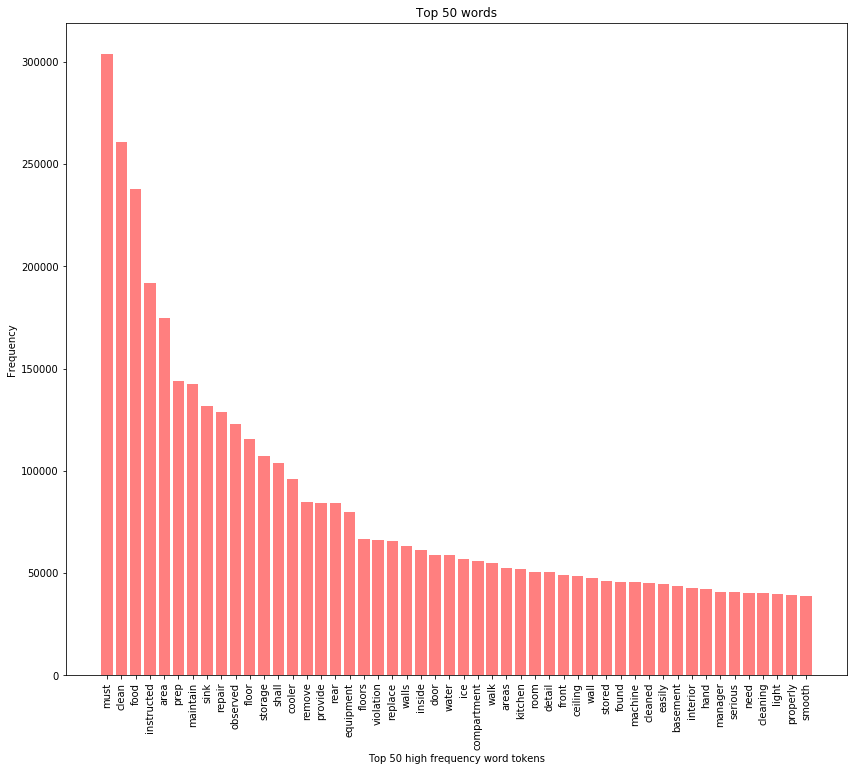

In [32]:
plt.figure(figsize=(14,12))
plt.bar([i[0] for i in freq.most_common(50)],[i[1] for i in freq.most_common(50)],align = 'center',alpha = 0.5,color = 'r')
plt.xticks([i[0] for i in freq.most_common(50)],rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 high frequency word tokens')
plt.title('Top 50 words')

Text(0.5,1,'Top 50 words')

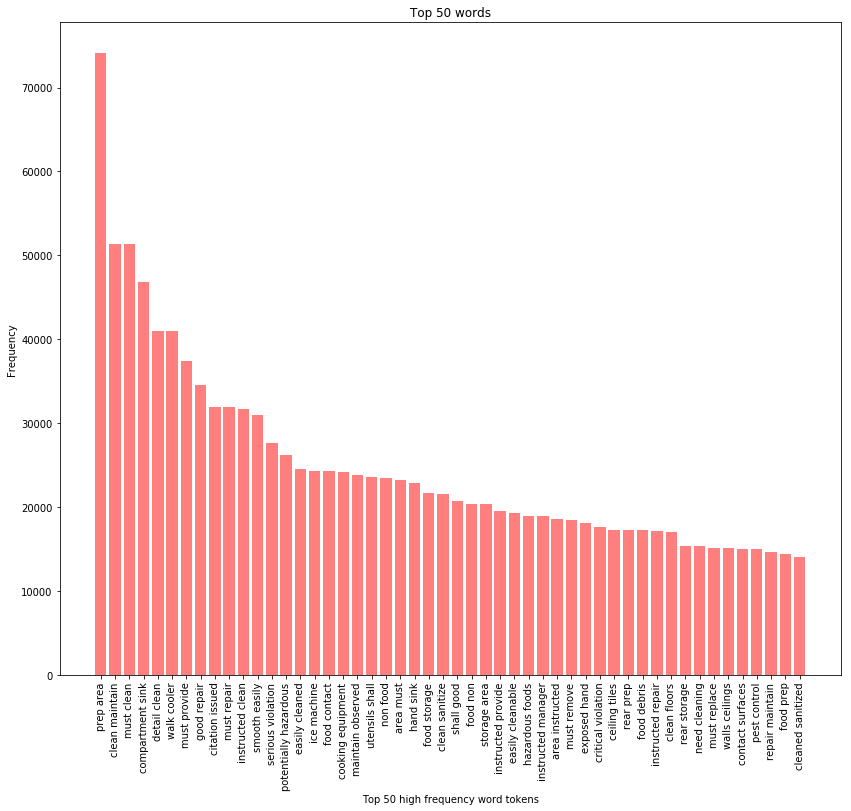

In [33]:
plt.figure(figsize=(14,12))
plt.bar([i[0][0] + ' ' + i[0][1] for i in bi_grams_counts.most_common(50)],[i[1] for i in bi_grams_counts.most_common(50)],align = 'center',alpha = 0.5,color = 'r')
plt.xticks([i[0][0] + ' ' + i[0][1] for i in bi_grams_counts.most_common(50)],rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 high frequency word tokens')
plt.title('Top 50 words')

In [34]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
wave_mask = np.array(Image.open("wave.jpg"))
wordcloud = WordCloud(stopwords=stop_word,
                      background_color='white',random_state=123).generate(" ".join(sentence for sentence in new_data))

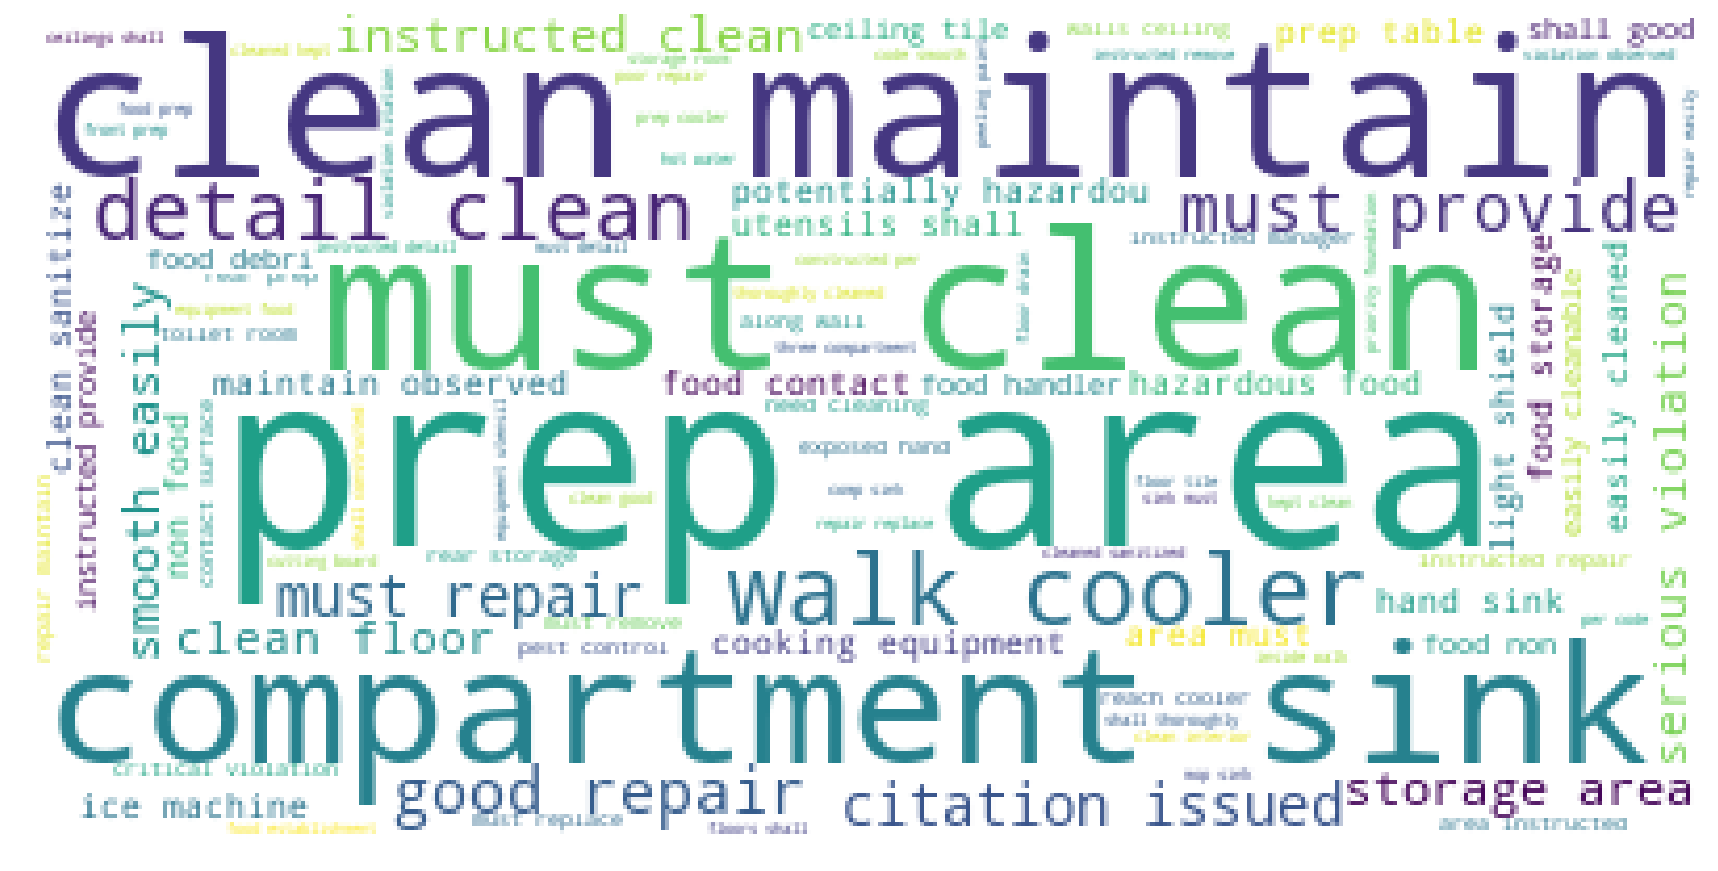

In [35]:
print(wordcloud)
fig = plt.figure(figsize=(30,30))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()